In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

## Unidad 3:

### Cálculo Numérico

- Integración.

**1** Resolver las siguientes integrales con los métodos propuestos. (Simpson, trapecio impropias)

a) $\int_0^1 \frac{x^4(1-x)^4}{1+x^2}\;\mathrm{d}x=\frac{22}{7}-\pi.$

b) $\int_0^\infty \frac{x^3}{e^x-1}\;\mathrm{d}x=\frac{\pi^4}{15}$ (aparece en teoría de Debye para la capacidad calorica en crystales).

c) $\int_0^1 x^{-x}\;\mathrm{d}x=\sum_{n=1}^\infty n^{-n}$ (conocida como "Sophomore's dream").

d) $\int_0^1 [\ln(1/x)]^p\;\mathrm{d}x=p!$ si $0 \le p \le 10$.

e) $\int_0^{2\pi} e^{z\cos\theta}\;\mathrm{d}\theta=2\pi I_0(z)$ (donde $I_0(z)$ es la función de Bessel de primera clase definida en $0 \le z \le 2$).

f) $\int _{0}^{\infty }\cos t^{2}\,dt=\int _{0}^{\infty }\sin t^{2}\,dt={\sqrt {\frac {\pi }{8}}}$.

Compare los resultados de los algoritmos dados en este capítulo a los dados por `scipy` o `sympy`.

b y f opcional, Bonus de 1pt (pista: hacer metodo de gauss-hermite)

In [22]:
import numpy as np
from scipy.special import roots_hermite

def integrando(u):
    return u**3 / (np.exp(u * np.sqrt(2)) - 1)

def gauss_hermite_integration(func, num_nodes):
    nodes, weights = roots_hermite(num_nodes)
    integral = 0
    for i in range(num_nodes):
        integral += func(nodes[i]) * weights[i]
    return integral

# Número de nodos para la aproximación
num_nodes = 100

# Calcular la aproximación de la integral utilizando el método de Gauss-Hermite
approx_integral = gauss_hermite_integration(integrando, num_nodes)
print("Aproximación de la integral utilizando el método de Gauss-Hermite:", approx_integral)

Aproximación de la integral utilizando el método de Gauss-Hermite: 0.772055546570482


In [2]:
# Método de Monte Carlo para el cálculo de integrales definidas
def Von_Neumann(f, a, b, N):
    # Generar un conjunto de puntos en el intervalo [a, b]
    x_points = np.linspace(a, b, num=1000)

    # Calcular la función en estos puntos
    y_points = f(x_points)

    # Tomar el mínimo y el máximo
    m = np.min(y_points)
    M = np.max(y_points)

    Nmax = 0
    Nmenos = 0
    for i in range(N):
       x = np.random.uniform(a, b)
       y = np.random.uniform(-m, M)
       # punto dentro del área positiva de la integral
       if (y > 0) and (y < f(x)): 
           Nmax += 1
       # punto dentro del área negativa de la integral
       if (y < 0) and (y > f(x)): 
           Nmenos += 1

    # la integral es el área positiva menos el área negativa
    #  y el área del rectángulo es 2W0(b-a).
    I = (Nmax - Nmenos) / N * (M + m) * (b - a)

    return I

# Método de Simpson 3/8 para el cálculo de integrales definidas
def Simpson3_8(f, a, b, particiones):
   h = (b - a) / particiones
   S = f(a) + f(b)
   for i in range(1, particiones):  # suma en 1, ..., n-1
        x = a + i * h
        if i % 3 == 0:
            S += 2 * f(x)  # suma de términos donde i es múltiplo de tres
        else:
            S += 3 * f(x)  # suma de términos donde i no es múltiplo de tres

   return S * (3 * h / 8)

In [3]:
# a)
a = lambda x: (x**4*(1-x)**4) / (1 + x**2)
valor_esperado_a = 22/7 - np.pi
print(f'Valor de la integral, literal a) {Simpson3_8(a, 0, 1, 100)}')
print(f'Valor esperado: {valor_esperado_a}\n')

# c)
c = lambda x: x**(-x)
valor_esperado_c = 0
for i in range(1, 1000):
    valor_esperado_c += i ** (-i)

print(f'Valor de la integral, literal c) {Simpson3_8(c, 0, 1, 100)}')
print(f'Valor esperado: {valor_esperado_c}\n')

# d)
p = 2
d = lambda x: (np.log(1/x))**p
valor_esperado_d = factorial(p)
print(f'Valor de la integral, literal d) {Von_Neumann(d, 0.0001, 1, 1000000)}')
print(f'Valor esperado: {valor_esperado_d}\n')

# e)
z = 1
e = lambda x: np.exp(z * np.cos(x))

# Función de Bessel de primera clase
def bessel_I0(z, terms=50):
    result = 0
    for k in range(terms):
        result += ((z / 2) ** (2 * k)) / ((factorial(k)) ** 2)
    return result

valor_esperado_e = 2 * np.pi * bessel_I0(z)
print(f'El valor de la integral, literal e) {Simpson3_8(e, 0, 2 * np.pi, 100)}')
print(f'Valor esperado: {valor_esperado_e}\n')

Valor de la integral, literal a) 0.0012644892599587715
Valor esperado: 0.0012644892673496777

Valor de la integral, literal c) 1.2887634691005994
Valor esperado: 1.2912859970626636

Valor de la integral, literal d) 1.9766892483717113
Valor esperado: 2

El valor de la integral, literal e) 7.9122137467428635
Valor esperado: 7.954926521012844



Puntos extra, integrales impropias por método de Gauss-Hermite

b) $\int_0^\infty \frac{x^3}{e^x-1}\;\mathrm{d}x=\frac{\pi^4}{15}$ (aparece en teoría de Debye para la capacidad calorica en crystales).

f) $\int _{0}^{\infty }\cos t^{2}\,dt=\int _{0}^{\infty }\sin t^{2}\,dt={\sqrt {\frac {\pi }{8}}}$.

In [44]:
########### PENDIENTE DE REVISAR ###########

**2** La [capacidad calorífica](https://es.wikipedia.org/wiki/Capacidad_calor%C3%ADfica) o capacidad térmica de un cuerpo, $C_V$, se define como el cociente entre la cantidad de energía calorífica transferida a un cuerpo y el cambio de temperatura que experimenta, es decir, $C_V$, mide la energía necesaria para aumentar la temperatura de un cuerpo en una unidad de temperatura. Según la teoría de Debye la capacidad calórica es dada por la integral,

$$
\frac {C_{V}}{Nk}=9\left({T \over T_{\rm {D}}}\right)^{3}\int _{0}^{T_{\rm {D}}/T}{x^{4}e^{x} \over \left(e^{x}-1\right)^{2}}\,dx,
$$

donde $T_D$ es la temperatura de Debye, $k$ es la constate de Bolzmann y $N$ el número de partículas contenidas en el volumen $V$.

a) Use los métodos de integración para graficar la capacidad calórica, $C_V/3Nk$, como función de $T/T_D$ en el intervalo $[0,1.5]$.

b) Einstein había propuesto inicialmente el modelo,

$$\frac{C_V}{3Nk}=\left({\epsilon\over k T}\right)^2{e^{\epsilon/kT}\over \left(e^{\epsilon/kT}-1\right)^2},$$

con energía dada por $\frac{\epsilon}{kT_D} = \frac{\hbar \omega}{kT_D} = \sqrt{3}\frac{\pi}{6}=0.805995977$, donde $\omega$ es definida como la frecuencia del oscilador usado en el modelo de Einstein.
Grafique y compare al modelo de Debye.

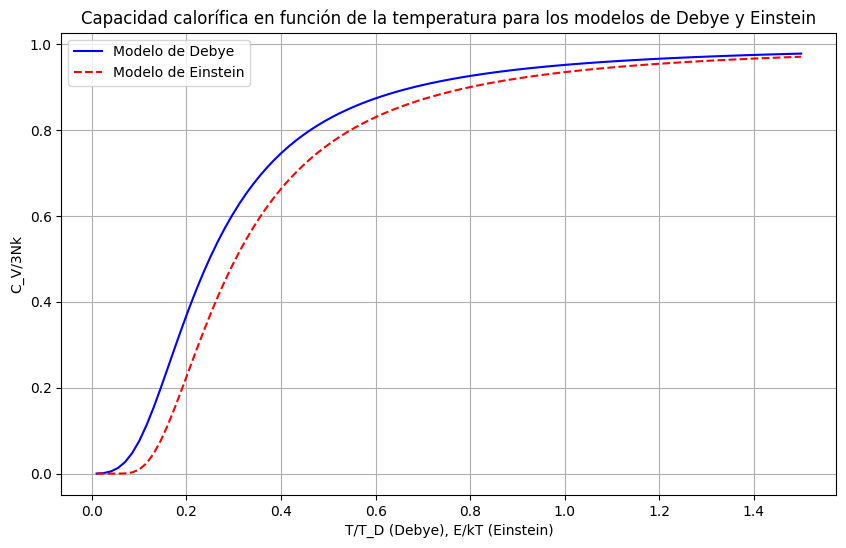

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Modelo de Debye
# Integral del modelo de Debye
def integral_debye(x):
    return x**4 * np.exp(x) / (np.exp(x) - 1)**2

# Cv/3Nk en función de T/T_D
def modelo_debye(ratio_T, n=1000):
    integral = Simpson3_8(integral_debye, 0.01, 1/ratio_T, n)
    return 3 * ratio_T**3 * integral

# Modelo de Einstein
# Cv/3Nk en función de E/kT calculado con T/T_D considerando E/kT = sqrt(3) * pi**2 / 6
def modelo_einstein(ratio_T_TD, n=1000):
    epsilon_k_T = np.sqrt(3) * np.pi/6 * ratio_T_TD
    Cv_3Nk_einstein = epsilon_k_T**2 * np.exp(epsilon_k_T) / (np.exp(epsilon_k_T) - 1)**2
    return Cv_3Nk_einstein

# Valores de T/T_D
ratios_T = np.linspace(0.01, 1.5, 100)  # comienza desde 0.01 para evitar la división por cero

# Capacidades de calor para los modelos de Debye y Einstein
Cv_debye = np.array([modelo_debye(ratio_T) for ratio_T in ratios_T])
Cv_einstein = np.array([modelo_einstein(1/ratio_T) for ratio_T in ratios_T])

plt.figure(figsize=(10, 6))

plt.plot(ratios_T, Cv_debye, label='Modelo de Debye', color='blue', linestyle='-')
plt.plot(ratios_T, Cv_einstein, label='Modelo de Einstein', color='red', linestyle='--')

plt.title('Capacidad calorífica en función de la temperatura para los modelos de Debye y Einstein')
plt.xlabel('T/T_D (Debye), E/kT (Einstein)')
plt.ylabel('C_V/3Nk')
plt.grid(True)
plt.legend()
plt.show()

**3** **Por librería o elección** En electromagnetismo se puede demostrar que el potencial producido por un anillo de radio $a=1.0$ m en el plano $xy$ con distribución de carga $\lambda$, en un punto P fuera del eje $z$ es dado por,

$$V = \frac{\lambda}{2 \pi \varepsilon_0}\sqrt{\frac{am}{x}} K(m)$$

donde,

$$m = \frac{2}{1 + \frac{z^{2} + x^{2} + a^{2}}{2 a x}},$$

y $K(m)$ es la integral elíptica completa de primera especie definida como,

$$K(m) = \int_{0}^{\pi/2} \frac{d  \phi}{\sqrt{1 - m \text{sen}^{2}(\phi)}}$$

a) Si  $\frac{\lambda}{2\pi\varepsilon_0}=1.0$, ¿cuál es el potencial eléctrico en el punto $(x,y,z)=(1.5,0,1.0)$?<br>

b) Grafique la solución para el caso en que $-100<x<100$ use pasos de $0.01$. ¿Qué puede concluir de la gráfica?si $z=cte$

c) La solución analítica es dada por la serie,

$$ K(m)={\frac {\pi }{2}}\sum _{n=0}^{\infty }\left({\frac {(2n)!}{2^{2n}(n!)^{2}}}\right)^{2}m^{n}={\frac {\pi }{2}}\sum _{n=0}^{\infty }{\bigl (}P_{2n}(0){\bigr )}^{2}m^{n},$$

donde y $P_n$ son los [polinomios de Legendre](#MATERIAL_COMPLEMENTARIO). Equivalentemente, también,

$$K(m)={\frac {\pi }{2}}\left(1+\left({\frac {1}{2}}\right)^{2}m+\left({\frac {1\cdot 3}{2\cdot 4}}\right)^{2}m^{2}+\cdots +\left({\frac {\left(2n-1\right)!!}{\left(2n\right)!!}}\right)^{2}m^{n}+\cdots \right),$$

donde $n!!$ es el doble factorial. Grafique y compare estas tres soluciones a la dada por la integral numérica ¿Qué concluye? (Nota: tenga cuidado con $x\leq 0$, en las series, considere la simetría para esto).


El potencial en el punto (1.5, 0, 1.0) es 2.1150424857741323


C:\Users\User\AppData\Local\Temp\ipykernel_14104\1494488842.py:19: RuntimeWarning: invalid value encountered in sqrt
  return lambda_2pi_epsilon0 * np.sqrt(a * m(x)) * K(m(x))


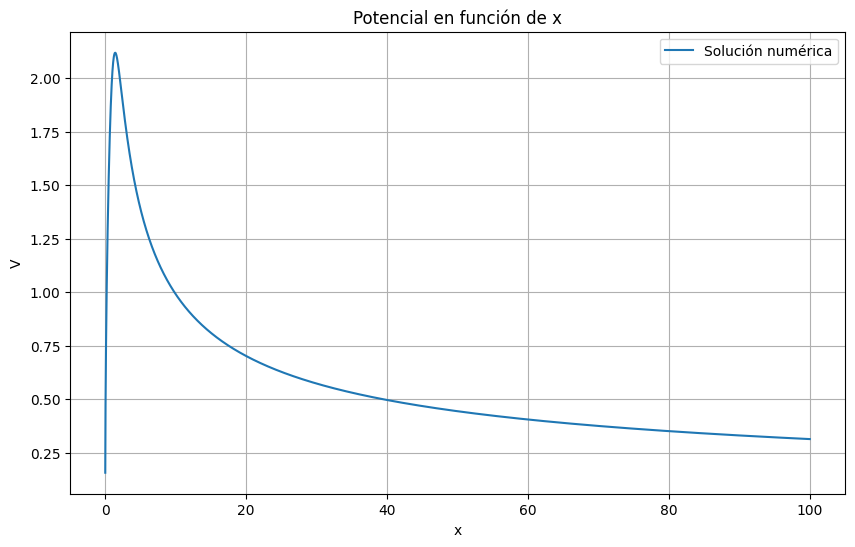

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\special\_orthogonal.py:2457: RuntimeWarning: overflow encountered in double_scalars
  kn = _gam(2 * n + 1) / _gam(n + 1)**2 / 2.0**n
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\special\_orthogonal.py:2457: RuntimeWarning: invalid value encountered in double_scalars
  kn = _gam(2 * n + 1) / _gam(n + 1)**2 / 2.0**n


KeyboardInterrupt: 

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.special import legendre

# Constantes
a = 1.0
lambda_2pi_epsilon0 = 1.0
z = 1.0

# Funciones
def m(x):
    return 2 / (1 + (z**2 + x**2 + a**2) / (2 * a * x))

def K(m):
    return integrate.quad(lambda phi: 1 / np.sqrt(1 - m * np.sin(phi)**2), 0, np.pi/2)[0]

def V(x):
    return lambda_2pi_epsilon0 * np.sqrt(a * m(x)) * K(m(x))

def K_series(m, n_terms=100):
    return np.pi/2 * np.sum([(legendre(2*n)(0))**2 * m**n for n in range(n_terms)])

# a) Potencial en el punto (1.5, 0, 1.0)
x_point = 1.5
V_point = V(x_point)
print(f'El potencial en el punto (1.5, 0, 1.0) es {V_point}')

# b) Gráfica de la solución para -100 < x < 100
x_values = np.linspace(-100, 100, 20000)
V_values = np.array([V(x) for x in x_values])

plt.figure(figsize=(10, 6))
plt.plot(x_values, V_values, label='Solución numérica')
plt.title('Potencial en función de x')
plt.xlabel('x')
plt.ylabel('V')
plt.grid(True)
plt.legend()
plt.show()

# c) Comparación con la solución analítica
V_series_values = np.array([K_series(m(x)) for x in x_values])

plt.figure(figsize=(10, 6))
plt.plot(x_values, V_values, label='Solución numérica')
plt.plot(x_values, V_series_values, label='Solución analítica', linestyle='--')
plt.title('Comparación de soluciones')
plt.xlabel('x')
plt.ylabel('V')
plt.grid(True)
plt.legend()
plt.show()